In [1]:
##############################
#04_Plotting example code    #
#Maintainer: Christopher Chan#
#Version: 0.0.2             #
#Date: 2023-06-20            #
##############################

import os, sys, re
import random
import pathlib

import numpy as np
import pyarrow as pa
import datetime as dt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# define paths
data_raw = pathlib.Path("../data/raw")
data_interim = pathlib.Path("../data/interim")
data_processed = pathlib.Path("../data/processed")
reports_figs = pathlib.Path("../reports/figures")

ESData = pd.read_parquet(f"{data_interim}/ESData_typeset.parquet", engine = "pyarrow", dtype_backend = "pyarrow")
ESData.sample(n = 5)

,FactorId,Name,Question,Date,Answer,PublicationDate,Restated,AgentId,AgentName,AgentGics,CountryOfOperation,SourceName,SourceType,Page,Comment,Excerpt,URL
38172,4908,EOPol1.04,Does the company disclose a commitment against...,2022-03-18,Yes,2022-12-08,False,64,Ultrapar Participacoes SA,10102040,"BRA,CYM,ESP,LUX,MEX,VEN,VGB",CODE OF ETHICS,Policy,8,<NA>,Equity and diversity We treat all of our rela...,https://ri.ultra.com.br/Download.aspx?Arquivo=...
732752,5030,WatInv4.142-x,Quantity withdrawn from groundwater,2022-08-28,Not Disclosed,2023-02-05,False,999,Costco Wholesale Corporation,30101040,"AUS,CAN,ESP,FRA,GBR,ISL,JPN,KOR,MEX,NZL,PRI,SW...",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
314045,4459,WLB4,Does the company refer to an unspecified flexi...,2021-12-31,No,2022-12-27,False,476,Acea SpA,55103010,"DOM,HND,ITA,LUX,PER",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
833302,4504,FinA2,Does the company declare that it disclosed the...,2022-12-31,No,2023-04-05,False,1139,Lockheed Martin Corporation,20101010,"USA,AUS,POL,ROU,GBR,ARG,CAN,ESP,UKR,DEU,MEX,CH...",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
885484,4988,CliInv15-x,Total scope 3 emissions for Category 1 - Purch...,2020-12-31,Not Disclosed,2023-01-31,False,1220,Pioneer Natural Resources Company,10102020,"USA,GBR,AUS,CHN,HKG,ARG,BHS,CYM,ZAF",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


### Let's check out the Scope emissions of the Construction industry

In [2]:
ConstructionGICS = [15102010, 20103010]

TCFD_construct = ESData[(ESData["AgentGics"].isin(ConstructionGICS)) & ESData["Question"].str.contains(r"scope\s\d.*", regex = True)]

TCFD_construct.sample(n = 5)

,FactorId,Name,Question,Date,Answer,PublicationDate,Restated,AgentId,AgentName,AgentGics,CountryOfOperation,SourceName,SourceType,Page,Comment,Excerpt,URL
197480,4617,CliInv23,Does the company disclose its scope 3 emission...,2022-12-31,No,2023-04-12,False,327,Hochtief AG,20103010,"AGO,ARE,ARG,AUS,AUT,AZE,BHR,BOL,BRA,BWA,CAN,CH...",<NA>,<NA>,<NA>,Updated FYE. Breakdown in Key Figures webpage...,<NA>,<NA>
308176,5000,CliInv27-x,Total scope 3 emissions for Category 13 - Down...,2021-12-31,Not Disclosed,2023-02-10,False,469,Wienerberger AG,15102010,"AUT,BEL,BGR,BIH,CAN,CHE,CZE,DEU,DNK,EST,FIN,FR...",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
366168,4611,CliInv17,Does the company disclose its scope 3 emission...,2021-12-31,No,2023-04-05,False,539,CRH Plc,15102010,"ARG,AUS,AUT,BEL,BRA,CAN,CHE,CHL,CHN,CZE,DEU,DN...",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
222333,4992,CliInv19-x,Total scope 3 emissions for Category 5 - Waste...,2022-12-31,Not Disclosed,2023-03-31,False,359,Royal Boskalis Westminster NV,20103010,"AGO,ARE,ARG,AUS,AZE,BEL,BMU,BRA,CAN,CHL,CHN,CY...",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
350914,4604,CliInv11.1,Does the company disclose location-based conso...,2021-12-31,No,2023-02-02,False,518,Bouygues SA,20103010,"ARE,AUS,AUT,BEL,CAN,CHE,CIV,CZE,DEU,DJI,DNK,ES...",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [3]:
print(TCFD_construct.shape)
TCFD_construct["FactorId"].unique()

(2085, 17)


<ArrowExtensionArray>
[4598, 4599, 4600, 4601, 4602, 4603, 4604, 4605, 4606, 4607, 4608, 4609, 4610,
 4611, 4612, 4613, 4614, 4615, 4616, 4617, 4618, 4619, 4620, 4621, 4622, 4623,
 4629, 4630, 4631, 4632, 4633, 4638, 4639, 4640, 4980, 4981, 4982, 4983, 4984,
 4985, 4986, 4987, 4988, 4989, 4990, 4991, 4992, 4993, 4994, 4995, 4996, 4997,
 4998, 4999, 5000, 5001, 5002]
Length: 57, dtype: int64[pyarrow]

Answer
No                                    730
Not Disclosed                         589
Yes                                   350
Yes, but information is incomplete     24
0 Metric tonnes (t) CO2e               16
                                     ... 
1.145084 m Metric tonnes (t) CO2e       1
965246 Metric tonnes (t) CO2e           1
997999 Metric tonnes (t) CO2e           1
855932 Metric tonnes (t) CO2            1
684783 Metric tonnes (t) CO2            1
Name: count, Length: 341, dtype: int64[pyarrow]
    No  Not Disclosed  Yes, but information is incomplete  Quantitative
0  730            589                                  24           392


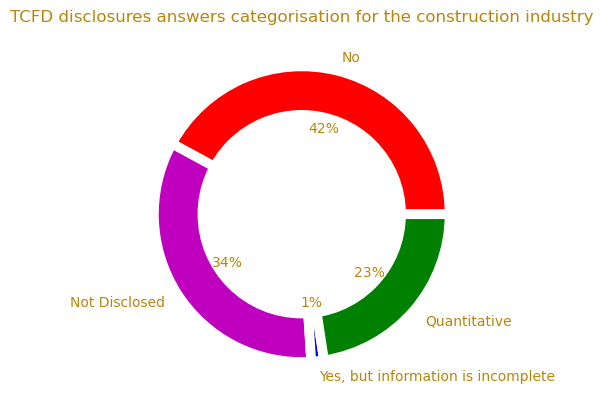

In [4]:
print(TCFD_construct["Answer"].value_counts(ascending = False, dropna = False))

TCFD_ans = pd.DataFrame({
    "No": TCFD_construct["Answer"].value_counts(ascending = False, dropna = False)[0],
    "Not Disclosed": TCFD_construct["Answer"].value_counts(ascending = False, dropna = True)[1],
    "Yes, but information is incomplete": TCFD_construct["Answer"].value_counts(ascending = False, dropna = False)[3],
    "Quantitative": TCFD_construct["Answer"].value_counts(ascending = False, dropna = False)[4:].sum(),
}, index = [0])

print(TCFD_ans)

donut = plt.Circle((0,0), 0.7, color = "white")

# Define colour scheme
donut_c = ["r", "m", "b", "g"]

plt.rcParams["text.color"] = "darkgoldenrod"

plt.pie(TCFD_ans.iloc[0, :], labels = TCFD_ans.columns,
        wedgeprops = {"linewidth": 7, "edgecolor": "white"}, colors = donut_c,
        autopct = "%0.0f%%")

p = plt.gcf()
p.gca().add_artist(donut)
plt.title("TCFD disclosures answers categorisation for the construction industry")
plt.show()

In [10]:
test = pd.DataFrame(TCFD_construct[TCFD_construct["FactorId"] == 4598]["Answer"].value_counts(ascending = False, dropna = False))
test.pivot_table(columns = "Answer")

Answer,No,Yes,"Yes, but information is incomplete"
count,2,23,8


In [18]:
def factor_Ans(df: pd.DataFrame, factor: int):
    """
    Function that automatically detects the types of answers 
    """
    factor_df = TCFD_construct[TCFD_construct["FactorId"] == factor]

    value_df = pd.DataFrame(factor_df["Answer"].value_counts(ascending = False, dropna = False))
    Pvalue_df = value_df.pivot_table(columns = "Answer")

    #print(Pvalue_df)

    quant_colIDX = [idx for idx, col in enumerate(Pvalue_df.columns) if col[0].isdigit()]

    #print(quant_colIDX)

    Pvalue_df["Quantitative"] = len(quant_colIDX)
    Pvalue_df["Quantitative"].replace(0, np.nan, inplace = True)


    # Drop the quantitative answer columns
    Pvalue_df.drop(Pvalue_df.columns[quant_colIDX], axis = 1, inplace = True)

    # Add the Factor and Question
    Pvalue_df.insert(0, "FactorId", factor)
    Pvalue_df.insert(1, "Question", factor_df["Question"].unique())

    Pvalue_df.reset_index(drop = True, inplace = True)
    Pvalue_df.rename_axis(index = None, columns = None, inplace = True)
    Pvalue_df.set_index("FactorId", inplace = True)

    print(Pvalue_df)
    return Pvalue_df

#factor_Ans(TCFD_construct, 4598)
df_list = []

for factor in TCFD_construct["FactorId"].unique():
    df_list.append(factor_Ans(TCFD_construct, factor))


                         Question                             
FactorId                                                      
4598      Does the company disclose its scope 1 (direct)...  \

          No                                   
FactorId                                       
4598                                       2  \

          Yes                                  
FactorId                                       
4598                                      23  \

          Yes, but information is incomplete   
FactorId                                       
4598                                       8  \

          Quantitative                        
FactorId                                      
4598                                     NaN  
                                               Question      No             
FactorId                                                                    
4599      Does the company disclose its scope 2 (indirec...             4  \

  

In [21]:
TCFD_constructAns = pd.concat(df_list)

TCFD_constructAns.sample(n = 8)

with open("../data/processed/TCFD_constructAns", "wb") as df:
    TCFD_constructAns.to_csv("../data/processed/TCFD_constrctAns.csv", sep = ";", index = True)